In [ ]:
%matplotlib notebook



In [59]:
# pip install pytuning
from pytuning.scales \
import create_edo_scale

edo_scale=create_edo_scale(12)
display(edo_scale)

[1,
 2**(1/12),
 2**(1/6),
 2**(1/4),
 2**(1/3),
 2**(5/12),
 sqrt(2),
 2**(7/12),
 2**(2/3),
 2**(3/4),
 2**(5/6),
 2**(11/12),
 2]

In [12]:
%matplotlib inline

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

def make_sin_waves(freqs, t):
    data = np.zeros(len(t))
    for f in freqs:
        data = data + np.sin(2. * np.pi * f * t)
    return data

sample_rate = 44100 # サンプリングレート(サンプル/s)
duration = 5.0      # 継続時間(s)…少し多めに
freq = 130.0        # 周波数（Hz）
t = np.linspace(0.,
        　　duration, int(duration*sample_rate))
edo_scale = [float(s) for s in edo_scale]
data_edo = make_sin_waves(
  freq * np.array(
     [edo_scale[0],edo_scale[4],edo_scale[7]]),t)

In [43]:
plt.rcParams["font.size"] = 24
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

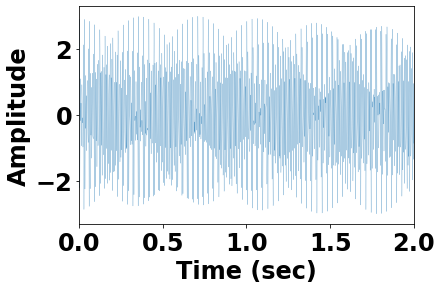

In [44]:
plt.figure(); plt.plot(t, data_edo)
plt.xlabel("Time(sec)");plt.ylabel("Amplitude")
plt.xlim([0,2]); plt.show() # 波形を図示

In [45]:
amplitude = np.iinfo(np.int16).max/3 #振幅最大値
# 音声を.wavファイルに保存
write(filename="edo.wav", rate=sample_rate, 
 data=(amplitude * data_edo).astype(np.int16))

In [46]:
from pytuning.scales import \
        create_diatonic_scale
from pytuning.constants import \
        five_limit_constructors
pure_scale=create_diatonic_scale(
  five_limit_constructors,"TtsTtTs")
display(pure_scale)

[1, 9/8, 5/4, 4/3, 3/2, 5/3, 15/8, 2]

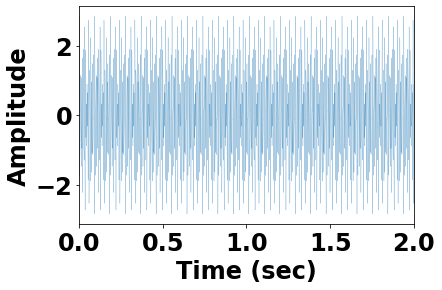

In [47]:
pure_scale = [float(s) for s in pure_scale]
data_pure = make_sin_waves( freq*np.array(
  [pure_scale[0],pure_scale[2],pure_scale[4]]),t)
plt.figure();plt.plot(t, data_pure); plt.show()
write(filename="pure.wav", rate=sample_rate, 
  data=(amplitude * data_pure).astype(np.int16))

In [ ]:
plt.figure(figsize=(1,6))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

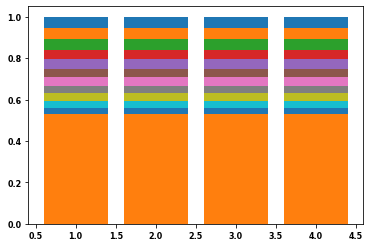

In [54]:
edo_scale2 = np.array([     
  np.array(edo_scale[:-1]),
  2.0*np.array(edo_scale[:-1]),
  4.0*np.array(edo_scale[:-1])]).flatten()
flet_max = 12; bridge_pos = np.array([[
  1/edo_scale2[i]*edo_scale2[0],
  1/edo_scale2[i+5]*edo_scale2[5],
  1/edo_scale2[i+9]*edo_scale2[9],
  1/edo_scale2[i+14]*edo_scale2[14]] \
        for i in range(flet_max)])
left = np.array([1,2,3,4])
for p in bridge_pos:
    plt.bar(left, p)

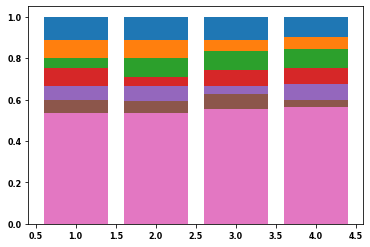

In [55]:
pure_scale2 = np.array([    
  np.array(pure_scale[:-1]),
  2.0*np.array(pure_scale[:-1]),
  4.0*np.array(pure_scale[:-1])]).flatten()
flet_max = 7; bridge_pos = np.array([[
  1/pure_scale2[i]*pure_scale2[0],
  1/pure_scale2[i+3]*pure_scale2[3],
  1/pure_scale2[i+5]*pure_scale2[5],
  1/pure_scale2[i+8]*pure_scale2[8]] \
        for i in range(flet_max)])
for p in bridge_pos:
    plt.bar(left, p)

In [56]:
from solid import *
import viewscad
import subprocess

In [57]:
def make_cube_at_pos(size_x, size_y, size_z, x, y, z):
    return translate([x, y, z])(cube([size_x, size_y, size_z], center=True))

thickness = 2
bridge_ex_x = 10; bridge_ex_y = 33.8; bridge_ex_z = 4.2
bridge_x = bridge_ex_x-2*thickness
bridge_y = bridge_ex_y + 2*thickness
bridge_z = bridge_ex_z + 2*thickness

bridge = make_cube_at_pos(bridge_x,bridge_y,bridge_z, 0,0,0)\
        -make_cube_at_pos(bridge_ex_x,bridge_ex_y,bridge_ex_z,0,0,-thickness)

scad_render_to_file(bridge, "bridge.scad")
openscad = '/Applications/OpenSCAD.app/Contents/MacOS/OpenSCAD'
subprocess.run([openscad, 'bridge.scad','-o bridge.stl','-q'])

r = viewscad.Renderer(width=600,height=400)
r.render(bridge)

Geometries in cache: 4
Geometry cache size in bytes: 2912
CGAL Polyhedrons in cache: 1
CGAL cache size in bytes: 22096
Total rendering time: 0:00:00.100
   Top level object is a 3D object:
   Simple:        yes
   Vertices:       16
   Halfedges:      48
   Edges:          24
   Halffacets:     20
   Facets:         10
   Volumes:         2
/Users/jun/.espressif/python_env/idf5.0_py3.7_env/lib/python3.7/site-packages/jupyter_client/session.py:716: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [58]:
def make_cube_at_pos(
        size_x, size_y, size_z, x, y, z):
    return translate([x, y, z])\
      (cube([size_x, size_y, size_z], center=True))

from solid import *; import viewscad; import subprocess
openscad='/Applications/OpenSCAD.app/Contents/MacOS/OpenSCAD'
total_len = 185;  neck_y = 24; thickness = 2 # 長さは mm
bridge_ex_x=12; bridge_ex_y=33.8;bridge_ex_z=4.2
bridge_x = bridge_ex_x - 2*thickness
bridge_y = bridge_ex_y + 2*thickness
bridge_z = bridge_ex_z + 2*thickness
bridge = make_cube_at_pos(bridge_x, bridge_y, bridge_z,
                          0, 0, bridge_z/2) \
        -make_cube_at_pos(bridge_ex_x, bridge_ex_y, \
                bridge_ex_z, 0, 0, bridge_z/2-thickness)
scad_render_to_file(bridge, "bridge.scad") # ファイル保存
subprocess.run([openscad,'bridge.scad','-o bridge.stl','-q'])

c = bridge; n = 4 # n は弦の数 
for j in range(n): # 弦の数分だけ
    for i in range(flet_max): # フレット
        pos = total_len*bridge_pos[i][j]
        h = 2+0.5*(total_len-pos)/total_len*bridge_z
        c = c + make_cube_at_pos( 2, neck_y/n, h, pos,
            -(j-1.5)*neck_y/n, h/2)
for j in range(n+1): # フレットを支える構造を作る
    c = c + make_cube_at_pos(
        total_len/2, 2, 2, 
        total_len*3/4, -(j-2)*neck_y/n, 2/2)
    scad_render_to_file(c, "all.scad")
subprocess.run([openscad, 'all.scad','-o all.stl','-q'])

r = viewscad.Renderer(width=600,height=400); r.render(c)

Geometries in cache: 55
Geometry cache size in bytes: 40040
CGAL Polyhedrons in cache: 2
CGAL cache size in bytes: 566472
Total rendering time: 0:00:06.250
   Top level object is a 3D object:
   Simple:        yes
   Vertices:      405
   Halfedges:    1220
   Edges:         610
   Halffacets:    370
   Facets:        185
   Volumes:         3
